### Make Necessary Imports

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [290]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional

In [129]:
from sklearn.preprocessing import MinMaxScaler

In [130]:
# %pip install scikit-learn

In [131]:
# pip install pandas

In [132]:
# pip install matplotlib

In [133]:
# pip install statsmodels

In [134]:
# pip install -q yfinance

In [135]:
import yfinance as yf
from datetime import datetime
# from pandas_datareader.data import DataReader
# from pandas_datareader import data as pdr

### Gather Necessary Data 

In [136]:
downloaded_stock_data = {}
company_ticker = ['AAPL', 'ADBE', 'NVDA', 'MSFT']
company_name = ["APPLE", "ADOBE", "NVIDIA", "MICROSOFT"]
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
for stock in company_ticker: 
    downloaded_stock_data[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [137]:
downloaded_stock_data

{'AAPL':                   Open        High         Low       Close   Adj Close   
 Date                                                                     
 2022-06-01  149.899994  151.740005  147.679993  148.710007  147.827286  \
 2022-06-02  147.830002  151.270004  146.860001  151.210007  150.312454   
 2022-06-03  146.899994  147.970001  144.460007  145.380005  144.517059   
 2022-06-06  147.029999  148.570007  144.899994  146.139999  145.272537   
 2022-06-07  144.350006  149.000000  144.100006  148.710007  147.827286   
 ...                ...         ...         ...         ...         ...   
 2023-05-24  171.089996  172.419998  170.520004  171.839996  171.839996   
 2023-05-25  172.410004  173.899994  171.690002  172.990005  172.990005   
 2023-05-26  173.320007  175.770004  173.110001  175.429993  175.429993   
 2023-05-30  176.960007  178.990005  176.570007  177.300003  177.300003   
 2023-05-31  177.330002  179.350006  176.759995  177.250000  177.250000   
 
               

In [138]:
for com_name, com_data in zip(company_name, downloaded_stock_data.items()): 
    com_data[1]["company_name"] = com_name
stock_data = [com_data for com_ticker, com_data in downloaded_stock_data.items()]
stock_data

[                  Open        High         Low       Close   Adj Close   
 Date                                                                     
 2022-06-01  149.899994  151.740005  147.679993  148.710007  147.827286  \
 2022-06-02  147.830002  151.270004  146.860001  151.210007  150.312454   
 2022-06-03  146.899994  147.970001  144.460007  145.380005  144.517059   
 2022-06-06  147.029999  148.570007  144.899994  146.139999  145.272537   
 2022-06-07  144.350006  149.000000  144.100006  148.710007  147.827286   
 ...                ...         ...         ...         ...         ...   
 2023-05-24  171.089996  172.419998  170.520004  171.839996  171.839996   
 2023-05-25  172.410004  173.899994  171.690002  172.990005  172.990005   
 2023-05-26  173.320007  175.770004  173.110001  175.429993  175.429993   
 2023-05-30  176.960007  178.990005  176.570007  177.300003  177.300003   
 2023-05-31  177.330002  179.350006  176.759995  177.250000  177.250000   
 
               Volume c

In [139]:
AAPL = stock_data[0]
ADBE = stock_data[1]
NVDA = stock_data[2]
MSFT = stock_data[3]

In [140]:
# stock_df = pd.concat(stock_data, axis=0)
stock_df = pd.concat(stock_data, axis=0)
stock_df.head(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-06-01,149.899994,151.740005,147.679993,148.710007,147.827286,74286600,APPLE
2022-06-02,147.830002,151.270004,146.860001,151.210007,150.312454,72348100,APPLE
2022-06-03,146.899994,147.970001,144.460007,145.380005,144.517059,88570300,APPLE
2022-06-06,147.029999,148.570007,144.899994,146.139999,145.272537,71598400,APPLE
2022-06-07,144.350006,149.000000,144.100006,148.710007,147.827286,67808200,APPLE
2022-06-08,148.580002,149.869995,147.460007,147.960007,147.081741,53950200,APPLE
2022-06-09,147.080002,147.949997,142.529999,142.639999,141.793320,69473000,APPLE
2022-06-10,140.279999,140.759995,137.059998,137.130005,136.316025,91437900,APPLE
2022-06-13,132.869995,135.199997,131.440002,131.880005,131.097183,122207100,APPLE


### Analyze Read-In Data

In [141]:
# Summary Statistics 
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,151.403427,153.307689,149.787172,151.656334,151.158549,7.400711e+07
std,12.368976,12.149220,12.644498,12.455354,12.521988,2.235869e+07
min,126.010002,127.769997,124.169998,125.019997,124.656975,3.519590e+07
25%,142.699997,144.665001,140.934998,142.915001,142.287239,5.788065e+07
50%,150.089996,151.830002,148.199997,150.720001,150.262161,7.043370e+07
75%,161.079994,162.440002,159.705002,161.090004,160.564598,8.356920e+07
max,177.330002,179.350006,176.759995,177.300003,177.300003,1.647624e+08


In [142]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-06-01 to 2023-05-31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [143]:
# Method: plot_stock_key_figures 
# Parameters: key_figure, key_figure_description 
    # key_figure: The stock attribute you seek to plot 
    # key_figure_description: A short description of the stock attribute for visual aid and descriptive purposes 
# Output: 4 graphs printed, no returned output 
# Purpose of function is to clearly plot the desired key attributes of any of the stocks 
def plot_stock_key_figures(key_figure, key_figure_description): 
    plt.figure(figsize=(16, 8))
    plt.subplots_adjust(top=1.75, bottom=1.4)

    for index, com_closing_prices in enumerate(stock_data):
        plt.subplot(2, 2, index+1)
        com_closing_prices[key_figure].plot()
        plt.xlabel('Date')
        plt.ylabel(f'{key_figure_description}')
        plt.grid(linestyle='-', linewidth=1)
        plt.title(f'{list(downloaded_stock_data.keys())[index]} {key_figure_description} By Date')

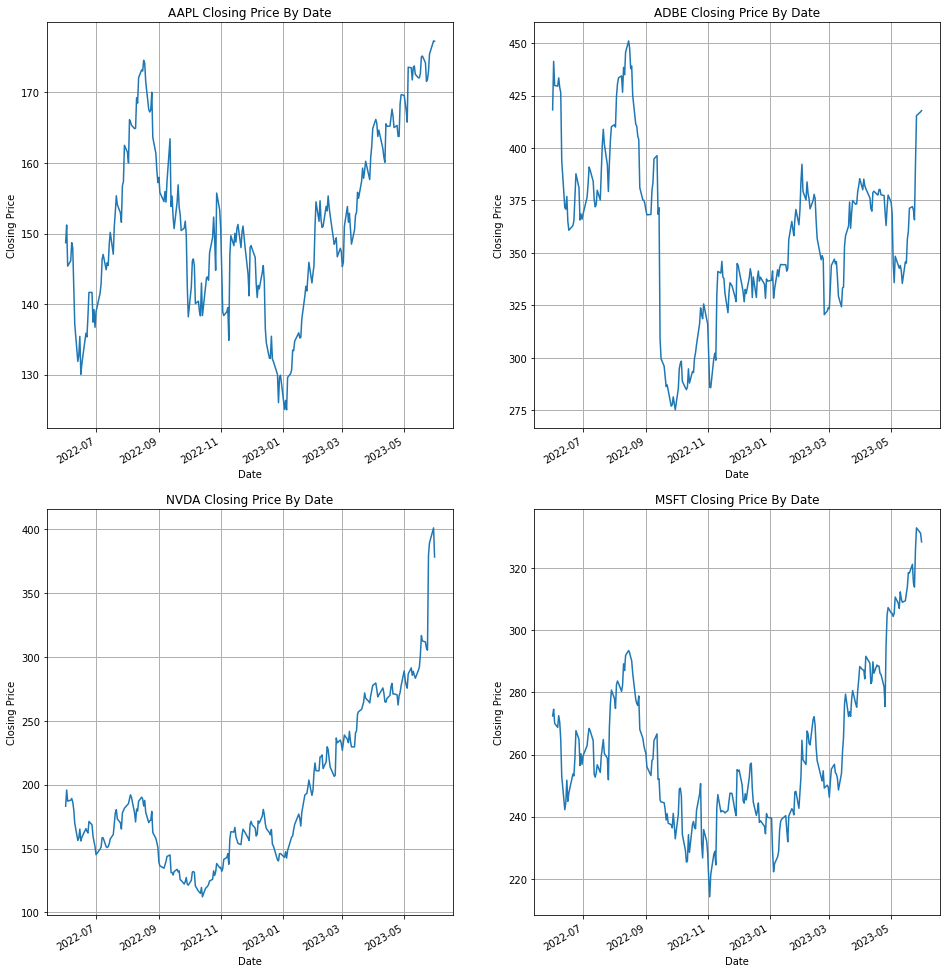

In [144]:
# Plot the non-adjusted closing prices 
plot_stock_key_figures("Close", "Closing Price")

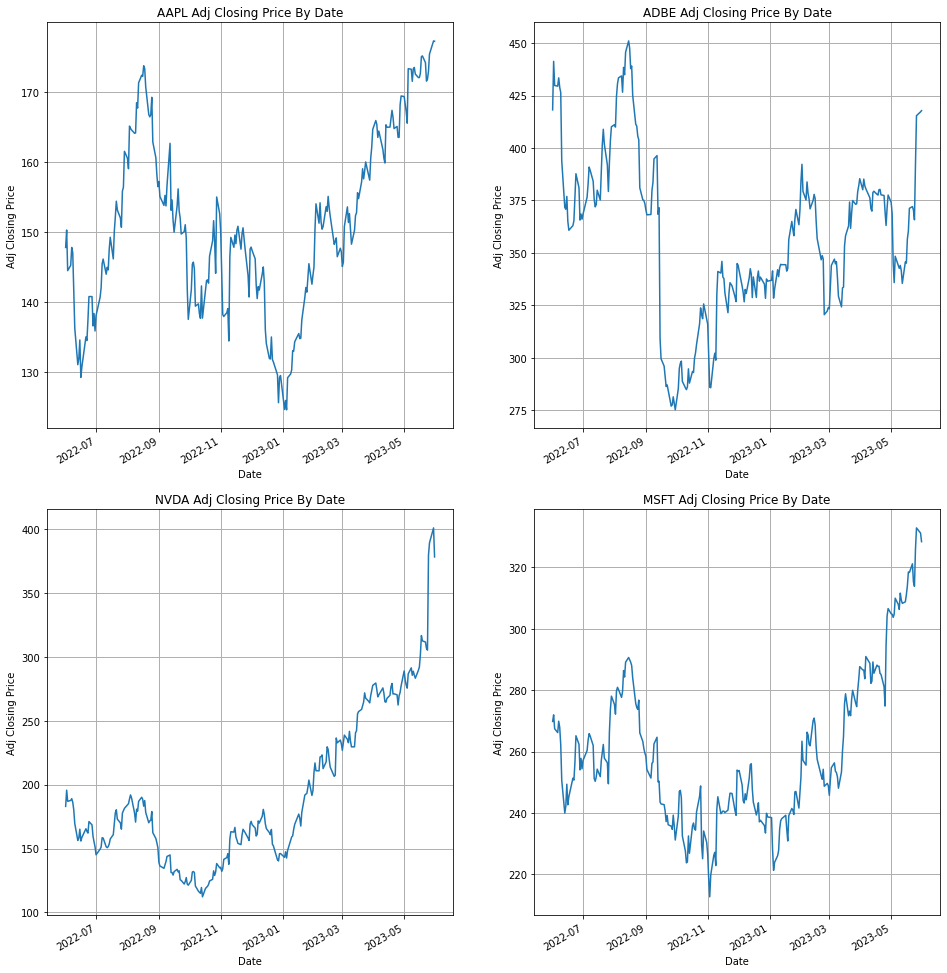

In [145]:
# Plot the adjusted closing prices 
plot_stock_key_figures("Adj Close", "Adj Closing Price")

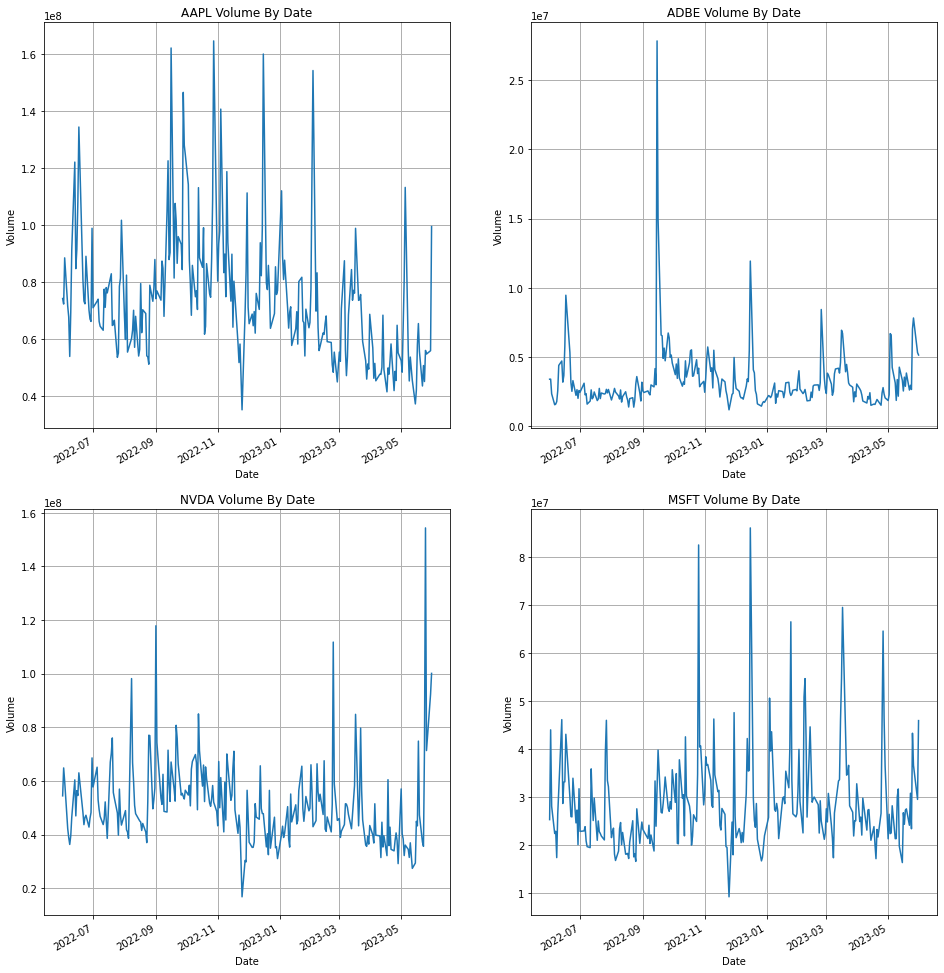

In [146]:
# Plot the volume traded 
plot_stock_key_figures("Volume", "Volume")

In [147]:
# Calculate different moving averages 
moving_average = [10, 14, 20, 50, 100]
for moving_average_days in moving_average: 
    for com_data in stock_data: 
        com_data[f'MA {moving_average_days}'] = com_data['Adj Close'].rolling(moving_average_days).mean()

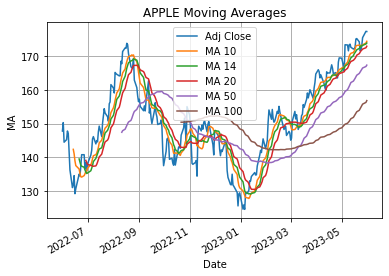

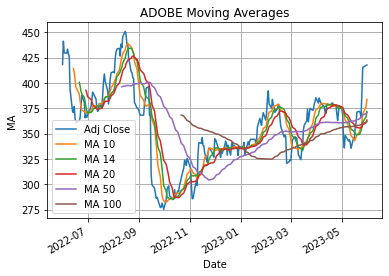

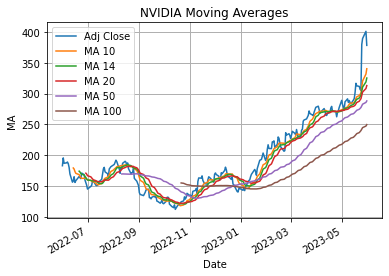

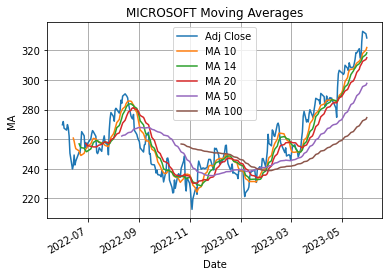

In [148]:
# Method: plot_ma 
# Parameters: com_data
    # com_data: The timeseries data of the desired stock/company 
# Output: 4 graphs printed, no returned output 
# Purpose of function is to clearly plot the different calculcated moving averages for each stock
def plot_ma(com_data): 
    com_data[['Adj Close', 'MA 10', 'MA 14', 'MA 20', 'MA 50', 'MA 100']].plot()
    plt.title(f'{com_data["company_name"][0]} Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('MA')
    plt.grid(linestyle='-', linewidth=1)   

for com_data in stock_data: 
    plot_ma(com_data)

In [166]:
# Method: test_time_series_stationarity 
# Parameters: time_series 
    # time_series: The timeseries data of the desired stock/company
# Output: 4 graphs printed with results of the Dickey-Fuller test, no returned output 
# Purpose of function is to perform the Dickey-Fuller test to test the stationarity of the data 
def test_time_series_stationarity(time_series, com_name):
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    df_test = adfuller(time_series, autolag='AIC')
    df_output = pd.Series(df_test[0:3], index=['Test Statistic','p-value',\
                                             '# of Used Observations'])
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'% key] = value
    print(df_output)

In [168]:
for com_name, com_data in downloaded_stock_data.items():
    print("Company Name: " + com_name)
    test_time_series_stationarity(com_data['Adj Close'], com_name)
    print()

Company Name: AAPL
Results of Dickey-Fuller Test:
Test Statistic           -1.250471
p-value                   0.651517
# of Used Observations    0.000000
Critical Value (1%)      -3.456781
Critical Value (5%)      -2.873172
Critical Value (10%)     -2.572969
dtype: float64

Company Name: ADBE
Results of Dickey-Fuller Test:
Test Statistic           -2.549590
p-value                   0.103870
# of Used Observations    1.000000
Critical Value (1%)      -3.456888
Critical Value (5%)      -2.873219
Critical Value (10%)     -2.572994
dtype: float64

Company Name: NVDA
Results of Dickey-Fuller Test:
Test Statistic            2.023907
p-value                   0.998703
# of Used Observations    5.000000
Critical Value (1%)      -3.457326
Critical Value (5%)      -2.873410
Critical Value (10%)     -2.573096
dtype: float64

Company Name: MSFT
Results of Dickey-Fuller Test:
Test Statistic           -0.306618
p-value                   0.924562
# of Used Observations    2.000000
Critical Value (1

<Figure size 432x288 with 0 Axes>

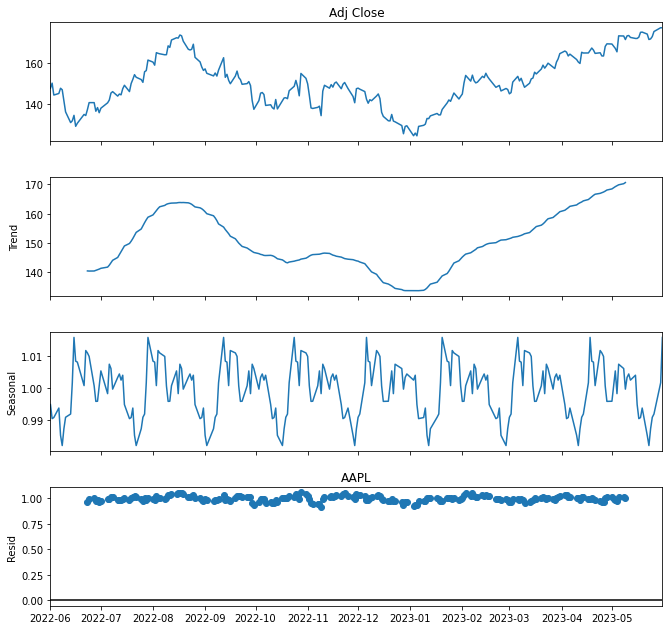

<Figure size 432x288 with 0 Axes>

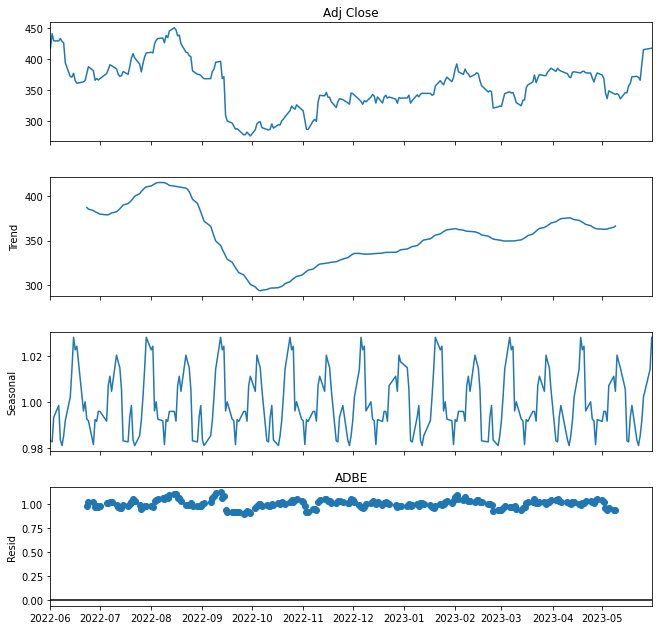

<Figure size 432x288 with 0 Axes>

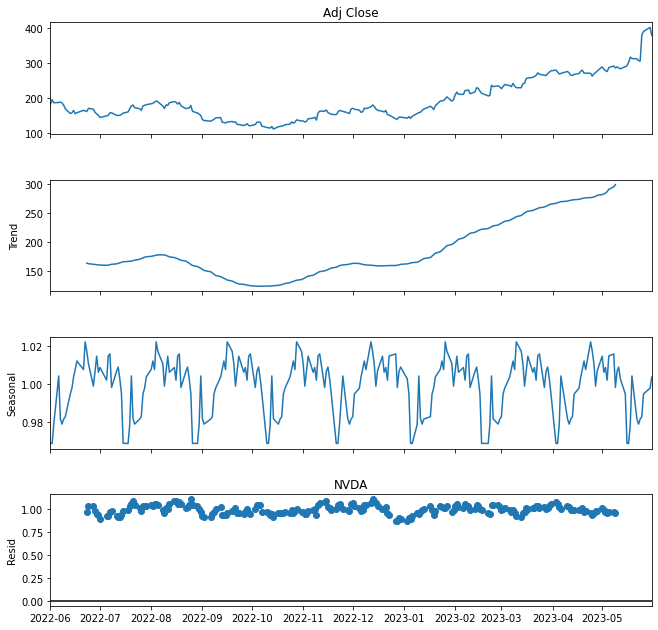

<Figure size 432x288 with 0 Axes>

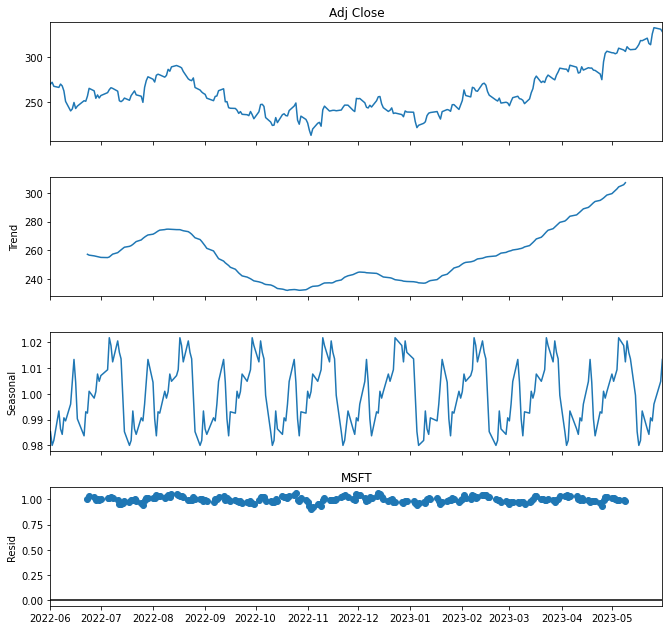

In [171]:
for com_name, com_data in downloaded_stock_data.items():
    result = seasonal_decompose(com_data['Adj Close'], model='multiplicative', period=30)
    fig = plt.figure() 
    fig = result.plot() 
    plt.title(com_name)
    fig.set_size_inches(10, 10)

In [173]:
# Removing trend and seasonality from the time series data for each stock 
AAPL_transformed = []
for com_name, com_data in downloaded_stock_data.items():
    com_data_transformed = com_data['Adj Close'].apply(np.log).apply(np.sqrt)
    com_data_differentiated = com_data_transformed - com_data_transformed.shift()
    com_data_differentiated = com_data_differentiated.dropna()
    print("Company Name: " + com_name)
    test_time_series_stationarity(com_data_differentiated, com_name)
    print()
    if com_name == 'AAPL': 
        AAPL_transformed.append(com_data_transformed)

Company Name: AAPL
Results of Dickey-Fuller Test:
Test Statistic           -6.991332e+00
p-value                   7.731151e-10
# of Used Observations    4.000000e+00
Critical Value (1%)      -3.457326e+00
Critical Value (5%)      -2.873410e+00
Critical Value (10%)     -2.573096e+00
dtype: float64

Company Name: ADBE
Results of Dickey-Fuller Test:
Test Statistic           -1.358620e+01
p-value                   2.078213e-25
# of Used Observations    0.000000e+00
Critical Value (1%)      -3.456888e+00
Critical Value (5%)      -2.873219e+00
Critical Value (10%)     -2.572994e+00
dtype: float64

Company Name: NVDA
Results of Dickey-Fuller Test:
Test Statistic           -6.831225e+00
p-value                   1.891481e-09
# of Used Observations    4.000000e+00
Critical Value (1%)      -3.457326e+00
Critical Value (5%)      -2.873410e+00
Critical Value (10%)     -2.573096e+00
dtype: float64

Company Name: MSFT
Results of Dickey-Fuller Test:
Test Statistic           -1.276172e+01
p-value    

In [233]:
AAPL_transformed

[Date
 2022-06-01    2.235183
 2022-06-02    2.238910
 2022-06-03    2.230112
 2022-06-06    2.231280
 2022-06-07    2.235183
                 ...   
 2023-05-24    2.268604
 2023-05-25    2.270074
 2023-05-26    2.273156
 2023-05-30    2.275487
 2023-05-31    2.275425
 Name: Adj Close, Length: 251, dtype: float64]

### Forecasting 

In [250]:
# # Forecasting AAPL 
# AAPL = stock_data[0]
# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_stock_data = scaler.fit_transform(AAPL_transformed)
# print(AAPL_transformed)
# print("Scaled") 
# scaled_stock_data
AAPL_transformed[0][1:10]

Date
2022-06-02    2.238910
2022-06-03    2.230112
2022-06-06    2.231280
2022-06-07    2.235183
2022-06-08    2.234052
2022-06-09    2.225842
2022-06-10    2.216974
2022-06-13    2.208153
2022-06-14    2.209658
Name: Adj Close, dtype: float64

In [254]:
len(AAPL_transformed[0])

251

In [255]:
X, y = [], []
num_days_pred = 60
for index in range(len(AAPL_transformed[0])):
    timestep_index = index + num_days_pred 
    if timestep_index < len(AAPL_transformed[0]): 
        X.append(AAPL_transformed[0][index:timestep_index])
        y.append(AAPL_transformed[0][timestep_index])
    else: 
        break 
X = np.array(X)
y = np.array(y)

In [256]:
X[0]

array([2.23518335, 2.23890959, 2.23011156, 2.23128025, 2.23518335,
       2.23405204, 2.22584153, 2.21697449, 2.20815283, 2.20965824,
       2.21415928, 2.20500393, 2.20760266, 2.21489167, 2.21402588,
       2.21884086, 2.22429233, 2.22429233, 2.21748372, 2.22039947,
       2.21629907, 2.21991366, 2.22413357, 2.226282  , 2.231602  ,
       2.23265562, 2.22932349, 2.23085046, 2.23028112, 2.23482199,
       2.23736775, 2.23270132, 2.2385992 , 2.24159447, 2.24493368,
       2.24311912, 2.24146328, 2.23948476, 2.24698773, 2.24778093,
       2.25494703, 2.25357794, 2.25150677, 2.25982682, 2.25940016,
       2.25909255, 2.258449  , 2.25851613, 2.26423332, 2.26325231,
       2.26793084, 2.26932234, 2.2691187 , 2.2710451 , 2.27053992,
       2.26718646, 2.26204239, 2.26159339, 2.26198963, 2.26526145])

In [257]:
# Reshape X for the LSTM model 
X = X.reshape((X.shape[0], X.shape[1], 1))

In [258]:
X.shape

(191, 60, 1)

In [280]:
# Using the last 60 days worth of data for testing
test_days = 60 
X_test, y_test = X[-test_days:], y[-test_days:]
X_train, y_train = X[:-test_days], y[:-test_days]

In [281]:
len(X_train), len(y_train)

(131, 131)

In [282]:
len(X_test), len(y_test)

(60, 60)

In [283]:
# Modelling with a vanilla/very simple LSTM 
model = Sequential()    
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.summary()
model.compile(optimizer='adam', 
              loss='mean_squared_error')

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 50)                10400     
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [284]:
model.fit(X_train, 
          y_train, 
          epochs=15, 
          batch_size = 64)

Epoch 1/15
3/3 [==============================] - 2s 22ms/step - loss: 4.9667
Epoch 2/15
3/3 [==============================] - 0s 22ms/step - loss: 3.4987
Epoch 3/15
3/3 [==============================] - 0s 22ms/step - loss: 2.3574
Epoch 4/15
3/3 [==============================] - 0s 23ms/step - loss: 1.4559
Epoch 5/15
3/3 [==============================] - 0s 22ms/step - loss: 0.7554
Epoch 6/15
3/3 [==============================] - 0s 21ms/step - loss: 0.2635
Epoch 7/15
3/3 [==============================] - 0s 20ms/step - loss: 0.0236
Epoch 8/15
3/3 [==============================] - 0s 22ms/step - loss: 0.0399
Epoch 9/15
3/3 [==============================] - 0s 21ms/step - loss: 0.1381
Epoch 10/15
3/3 [==============================] - 0s 20ms/step - loss: 0.1393
Epoch 11/15
3/3 [==============================] - 0s 22ms/step - loss: 0.0753
Epoch 12/15
3/3 [==============================] - 0s 21ms/step - loss: 0.0210
Epoch 13/15
3/3 [==============================] - 0s 20ms/st

In [285]:
# Evaluate the model on the test data 
test_results = model.evaluate(X_test, y_test, batch_size=64)
test_results

1/1 [==============================] - 0s 385ms/step - loss: 0.0220


0.022034406661987305

In [286]:
# Predict/Forecast
y_pred = model.predict(X_test)
# Preliminary to check if the values are "reasonable" 
y_pred[:10]

2/2 [==============================] - 0s 7ms/step


array([[2.106162 ],
       [2.1063347],
       [2.1064734],
       [2.106669 ],
       [2.1067858],
       [2.1067717],
       [2.106782 ],
       [2.106873 ],
       [2.1069815],
       [2.10721  ]], dtype=float32)

In [287]:
test_original = downloaded_stock_data["AAPL"][-test_days:]

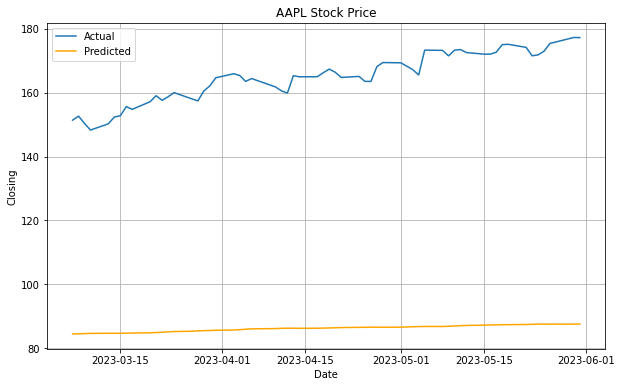

In [288]:
# Consolidating Predictions
pred_data = pd.DataFrame(y_pred, test_original.index,columns=['Close'])
actual_data = pd.DataFrame(y_test, test_original.index, columns=['Close'])
pred_data = pred_data.apply(np.square).apply(np.exp)
actual_data = actual_data.apply(np.square).apply(np.exp)


# Compare actual vs. predicted 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing')
plt.plot(actual_data, label='Actual')
plt.plot(pred_data, 'orange', label='Predicted')
plt.title('AAPL Stock Price')
plt.legend()

### Another LSTM Model

In [271]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
5/5 [==============================] - 3s 64ms/step - loss: 2.6807
Epoch 2/15
5/5 [==============================] - 0s 72ms/step - loss: 0.3564
Epoch 3/15
5/5 [==============================] - 0s 68ms/step - loss: 0.0435
Epoch 4/15
5/5 [==============================] - 0s 62ms/step - loss: 0.0995
Epoch 5/15
5/5 [==============================] - 0s 66ms/step - loss: 0.0082
Epoch 6/15
5/5 [==============================] - 0s 66ms/step - loss: 0.0311
Epoch 7/15
5/5 [==============================] - 0s 64ms/step - loss: 0.0021
Epoch 8/15
5/5 [==============================] - 0s 67ms/step - loss: 0.0107
Epoch 9/15
5/5 [==============================] - 0s 64ms/step - loss: 0.0019
Epoch 10/15
5/5 [==============================] - 0s 73ms/step - loss: 0.0031
Epoch 11/15
5/5 [==============================] - 0s 66ms/step - loss: 0.0013
Epoch 12/15
5/5 [==============================] - 0s 66ms/step - loss: 8.5615e-04
Epoch 13/15
5/5 [==============================] - 0s 65m

In [272]:
# Evaluate the model on the test data 
test_results = model.evaluate(X_test, y_test, batch_size=32)
print(test_results)

2/2 [==============================] - 1s 24ms/step - loss: 6.5632e-04
0.0006563151837326586


In [273]:
# Predict/Forecast
y_pred = model.predict(X_test)

2/2 [==============================] - 1s 23ms/step


In [274]:
y_pred

array([[2.2305868],
       [2.2306428],
       [2.2307453],
       [2.230836 ],
       [2.2308784],
       [2.2309177],
       [2.2309852],
       [2.2310748],
       [2.2312217],
       [2.2313867],
       [2.2315946],
       [2.2318487],
       [2.2320998],
       [2.2323542],
       [2.232617 ],
       [2.232842 ],
       [2.2330217],
       [2.2332087],
       [2.2334151],
       [2.2336636],
       [2.2339475],
       [2.2342346],
       [2.2344832],
       [2.2347062],
       [2.2348616],
       [2.234946 ],
       [2.2349668],
       [2.2350256],
       [2.2351015],
       [2.2351897],
       [2.2353003],
       [2.235437 ],
       [2.2355711],
       [2.235674 ],
       [2.2357547],
       [2.2357924],
       [2.2358005],
       [2.2358537],
       [2.2359538],
       [2.2360816],
       [2.2362075],
       [2.2363102],
       [2.2363675],
       [2.2365003],
       [2.236676 ],
       [2.2368505],
       [2.2370408],
       [2.2372336],
       [2.2374063],
       [2.2375495],


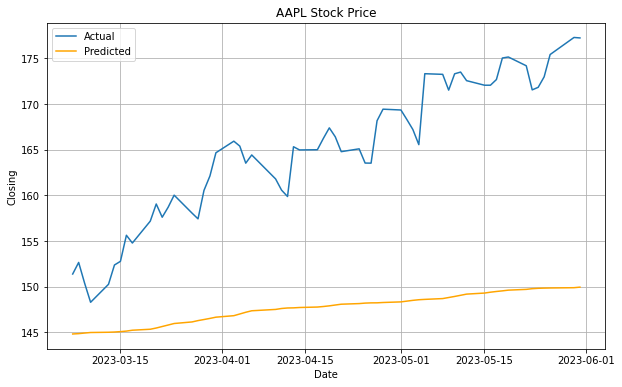

In [279]:
# Consolidating Predictions
pred_data = pd.DataFrame(y_pred, test_original.index,columns=['Close'])
actual_data = pd.DataFrame(y_test, test_original.index, columns=['Close'])
pred_data = pred_data.apply(np.square).apply(np.exp)
actual_data = actual_data.apply(np.square).apply(np.exp)

# Compare actual vs. predicted 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing')
plt.plot(actual_data, label='Actual')
plt.plot(pred_data, 'orange', label='Predicted')
plt.title('AAPL Stock Price')
plt.legend()

In [300]:
# Bidirectional LSTM 
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
5/5 [==============================] - 2s 25ms/step - loss: 5.5759
Epoch 2/15
5/5 [==============================] - 0s 25ms/step - loss: 3.4915
Epoch 3/15
5/5 [==============================] - 0s 33ms/step - loss: 1.5338
Epoch 4/15
5/5 [==============================] - 0s 37ms/step - loss: 0.6629
Epoch 5/15
5/5 [==============================] - 0s 33ms/step - loss: 0.0968
Epoch 6/15
5/5 [==============================] - 0s 28ms/step - loss: 0.0336
Epoch 7/15
5/5 [==============================] - 0s 30ms/step - loss: 0.0177
Epoch 8/15
5/5 [==============================] - 0s 26ms/step - loss: 0.0244
Epoch 9/15
5/5 [==============================] - 0s 29ms/step - loss: 0.0132
Epoch 10/15
5/5 [==============================] - 0s 31ms/step - loss: 0.0092
Epoch 11/15
5/5 [==============================] - 0s 28ms/step - loss: 0.0028
Epoch 12/15
5/5 [==============================] - 0s 27ms/step - loss: 0.0020
Epoch 13/15
5/5 [==============================] - 0s 28ms/st

In [301]:
# Evaluate the model on the test data 
test_results = model.evaluate(X_test, y_test, batch_size=32)
print(test_results)

# Predict/Forecast
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 8ms/step - loss: 3.8039e-04
0.00038038595812395215
2/2 [==============================] - 0s 8ms/step


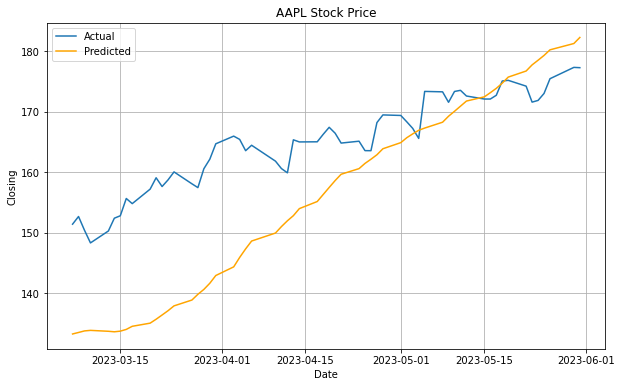

In [302]:
# Consolidating Predictions
pred_data = pd.DataFrame(y_pred, test_original.index,columns=['Close'])
actual_data = pd.DataFrame(y_test, test_original.index, columns=['Close'])
pred_data = pred_data.apply(np.square).apply(np.exp)
actual_data = actual_data.apply(np.square).apply(np.exp)

# Compare actual vs. predicted 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing')
plt.plot(actual_data, label='Actual')
plt.plot(pred_data, 'orange', label='Predicted')
plt.title('AAPL Stock Price')
plt.legend()

In [305]:
# Modified Bidirectional LSTM #1
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], 1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
5/5 [==============================] - 2s 23ms/step - loss: 4.0820
Epoch 2/15
5/5 [==============================] - 0s 25ms/step - loss: 2.0147
Epoch 3/15
5/5 [==============================] - 0s 26ms/step - loss: 0.4600
Epoch 4/15
5/5 [==============================] - 0s 40ms/step - loss: 0.2190
Epoch 5/15
5/5 [==============================] - 0s 33ms/step - loss: 0.0365
Epoch 6/15
5/5 [==============================] - 0s 27ms/step - loss: 0.0137
Epoch 7/15
5/5 [==============================] - 0s 33ms/step - loss: 0.0275
Epoch 8/15
5/5 [==============================] - 0s 32ms/step - loss: 0.0078
Epoch 9/15
5/5 [==============================] - 0s 28ms/step - loss: 0.0015
Epoch 10/15
5/5 [==============================] - 0s 42ms/step - loss: 0.0057
Epoch 11/15
5/5 [==============================] - 0s 40ms/step - loss: 0.0013
Epoch 12/15
5/5 [==============================] - 0s 36ms/step - loss: 8.2247e-04
Epoch 13/15
5/5 [==============================] - 0s 28m

In [306]:
# Evaluate the model on the test data 
test_results = model.evaluate(X_test, y_test, batch_size=32)
print(test_results)

# Predict/Forecast
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 8ms/step - loss: 3.1275e-05
3.127509626210667e-05
2/2 [==============================] - 0s 8ms/step


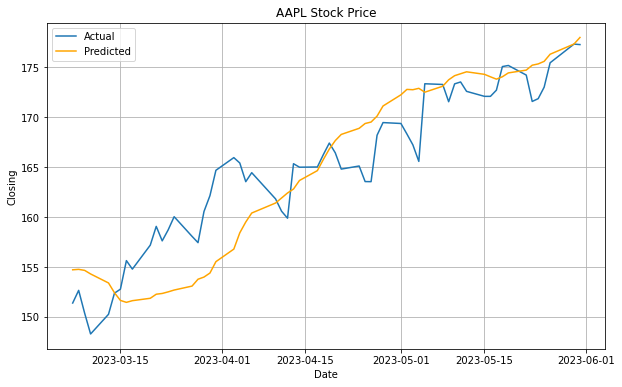

In [307]:
# Consolidating Predictions
pred_data = pd.DataFrame(y_pred, test_original.index,columns=['Close'])
actual_data = pd.DataFrame(y_test, test_original.index, columns=['Close'])
pred_data = pred_data.apply(np.square).apply(np.exp)
actual_data = actual_data.apply(np.square).apply(np.exp)

# Compare actual vs. predicted 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing')
plt.plot(actual_data, label='Actual')
plt.plot(pred_data, 'orange', label='Predicted')
plt.title('AAPL Stock Price')
plt.legend()

In [335]:
# Modified Bidirectional LSTM #2
model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
# model.add(LSTM(64, return_sequences=False))
model.add(Bidirectional(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1))))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
# model.add(Dense(32))
model.add(Dense(1))
# model.add(LSTM(32, return_sequences=False))
# model.add(Dense(32))
# model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
5/5 [==============================] - 3s 60ms/step - loss: 2.9897
Epoch 2/15
5/5 [==============================] - 0s 63ms/step - loss: 0.7190
Epoch 3/15
5/5 [==============================] - 0s 74ms/step - loss: 0.3945
Epoch 4/15
5/5 [==============================] - 0s 65ms/step - loss: 0.4044
Epoch 5/15
5/5 [==============================] - 0s 65ms/step - loss: 0.3063
Epoch 6/15
5/5 [==============================] - 0s 68ms/step - loss: 0.2842
Epoch 7/15
5/5 [==============================] - 0s 68ms/step - loss: 0.2679
Epoch 8/15
5/5 [==============================] - 0s 71ms/step - loss: 0.2438
Epoch 9/15
5/5 [==============================] - 0s 67ms/step - loss: 0.2339
Epoch 10/15
5/5 [==============================] - 0s 70ms/step - loss: 0.2193
Epoch 11/15
5/5 [==============================] - 0s 72ms/step - loss: 0.2107
Epoch 12/15
5/5 [==============================] - 0s 68ms/step - loss: 0.2015
Epoch 13/15
5/5 [==============================] - 0s 67ms/st

In [336]:
# Evaluate the model on the test data
test_results = model.evaluate(X_test, y_test, batch_size=64)
print(test_results)

# Predict/Forecast
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 777ms/step - loss: 0.1437
0.14372745156288147
2/2 [==============================] - 1s 22ms/step


In [339]:
# The simpler the model in terms of hidden layers, etc., the more likely one is better able to identify the 
# underlying pattern. 

### Repeating Forecasting without Modifying the Data with Respect to the Dickey-Fuller test

In [345]:
AAPL_transformed = AAPL['Adj Close']
AAPL_transformed

Date
2022-06-01    147.827286
2022-06-02    150.312454
2022-06-03    144.517059
2022-06-06    145.272537
2022-06-07    147.827286
                 ...    
2023-05-24    171.839996
2023-05-25    172.990005
2023-05-26    175.429993
2023-05-30    177.300003
2023-05-31    177.250000
Name: Adj Close, Length: 251, dtype: float64

In [346]:
len(AAPL_transformed)

251

In [347]:
X, y = [], []
num_days_pred = 60
for index in range(len(AAPL_transformed)):
    timestep_index = index + num_days_pred 
    if timestep_index < len(AAPL_transformed): 
        X.append(AAPL_transformed[index:timestep_index])
        y.append(AAPL_transformed[timestep_index])
    else: 
        break 
X = np.array(X)
y = np.array(y)

In [348]:
X[0]

array([147.82728577, 150.31245422, 144.51705933, 145.27253723,
       147.82728577, 147.08174133, 141.7933197 , 136.31602478,
       131.09718323, 131.9719696 , 134.62609863, 129.28797913,
       130.77908325, 135.06350708, 134.54660034, 137.44924927,
       140.81913757, 140.81913757, 136.62419128, 138.40356445,
       135.90846252, 138.10533142, 140.71972656, 142.07165527,
       145.48129272, 146.16719055, 144.0100708 , 144.99420166,
       144.62640381, 147.58869934, 149.27861023, 146.19702148,
       150.10369873, 152.13157654, 154.42788696, 153.175354  ,
       152.04212952, 150.70013428, 155.85932922, 156.41600037,
       161.54537964, 160.55130005, 159.06019592, 165.14390564,
       164.82579041, 164.59684753, 164.11901855, 164.16879272,
       168.46913147, 167.72253418, 171.31608582, 172.40112305,
       172.24186707, 173.75492859, 173.35673523, 170.73872375,
       166.80671692, 166.46826172, 166.76690674, 169.25550842])

In [349]:
# Reshape X for the LSTM model 
X = X.reshape((X.shape[0], X.shape[1], 1))

In [350]:
X.shape

(191, 60, 1)

In [351]:
# Using the last 60 days worth of data for testing
test_days = 60 
X_test, y_test = X[-test_days:], y[-test_days:]
X_train, y_train = X[:-test_days], y[:-test_days]

In [352]:
len(X_train), len(y_train)

(131, 131)

In [353]:
len(X_test), len(y_test)

(60, 60)

In [354]:
# Modelling with a vanilla/very simple LSTM 
model = Sequential()    
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.summary()
model.compile(optimizer='adam', 
              loss='mean_squared_error')

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_64 (LSTM)              (None, 50)                10400     
                                                                 
 dense_53 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [355]:
model.fit(X_train, 
          y_train, 
          epochs=15, 
          batch_size = 64)

Epoch 1/15
3/3 [==============================] - 1s 19ms/step - loss: 20767.2402
Epoch 2/15
3/3 [==============================] - 0s 15ms/step - loss: 20726.3594
Epoch 3/15
3/3 [==============================] - 0s 16ms/step - loss: 20684.3496
Epoch 4/15
3/3 [==============================] - 0s 15ms/step - loss: 20641.5684
Epoch 5/15
3/3 [==============================] - 0s 16ms/step - loss: 20600.9844
Epoch 6/15
3/3 [==============================] - 0s 15ms/step - loss: 20563.3594
Epoch 7/15
3/3 [==============================] - 0s 15ms/step - loss: 20525.7402
Epoch 8/15
3/3 [==============================] - 0s 16ms/step - loss: 20481.2051
Epoch 9/15
3/3 [==============================] - 0s 15ms/step - loss: 20428.3672
Epoch 10/15
3/3 [==============================] - 0s 15ms/step - loss: 20371.7969
Epoch 11/15
3/3 [==============================] - 0s 14ms/step - loss: 20305.8320
Epoch 12/15
3/3 [==============================] - 0s 14ms/step - loss: 20227.2812
Epoch 13/15
3

In [356]:
# Evaluate the model on the test data 
test_results = model.evaluate(X_test, y_test, batch_size=64)
test_results

1/1 [==============================] - 0s 252ms/step - loss: 26098.7383


26098.73828125

In [357]:
# Predict/Forecast
y_pred = model.predict(X_test)
# Preliminary to check if the values are "reasonable" 
y_pred[:10]

2/2 [==============================] - 0s 5ms/step


array([[3.4761522],
       [3.4756467],
       [3.475897 ],
       [3.4753792],
       [3.474902 ],
       [3.4752882],
       [3.475753 ],
       [3.475823 ],
       [3.4764535],
       [3.4762175]], dtype=float32)

In [358]:
test_original = downloaded_stock_data["AAPL"][-test_days:]

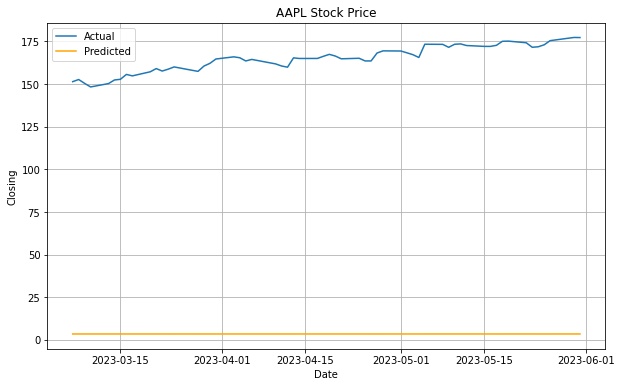

In [360]:
# Consolidating Predictions
pred_data = pd.DataFrame(y_pred, test_original.index,columns=['Close'])
actual_data = pd.DataFrame(y_test, test_original.index, columns=['Close'])

# Compare actual vs. predicted 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing')
plt.plot(actual_data, label='Actual')
plt.plot(pred_data, 'orange', label='Predicted')
plt.title('AAPL Stock Price')
plt.legend()

In [377]:
# Clearly, the data needs to be manipulated so that the neural network can better identify the underlying 
# pattern. 

### Forecasting by Scaling the Raw Data without Modification with Respect to the Dickey-Fuller Test

In [420]:
AAPL_transformed = AAPL[['Adj Close']]
AAPL_transformed

,Adj Close
Date,
2022-06-01,147.827286
2022-06-02,150.312454
2022-06-03,144.517059
2022-06-06,145.272537
2022-06-07,147.827286
...,...
2023-05-24,171.839996
2023-05-25,172.990005
2023-05-26,175.429993


In [421]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_stock_data = scaler.fit_transform(AAPL_transformed)
scaled_stock_data

array([[4.40140162e-01],
       [4.87348093e-01],
       [3.77259538e-01],
       [3.91610497e-01],
       [4.40140162e-01],
       [4.25977898e-01],
       [3.25519741e-01],
       [2.21473771e-01],
       [1.22337347e-01],
       [1.38954674e-01],
       [1.89372158e-01],
       [8.79699456e-02],
       [1.16294762e-01],
       [1.97681111e-01],
       [1.87862019e-01],
       [2.43000353e-01],
       [3.07014306e-01],
       [3.07014306e-01],
       [2.27327661e-01],
       [2.61128398e-01],
       [2.13731772e-01],
       [2.55463203e-01],
       [3.05125907e-01],
       [3.30806966e-01],
       [3.95575988e-01],
       [4.08605213e-01],
       [3.67628851e-01],
       [3.86323271e-01],
       [3.79336632e-01],
       [4.35608006e-01],
       [4.67709329e-01],
       [4.09171877e-01],
       [4.83382601e-01],
       [5.21903900e-01],
       [5.65524309e-01],
       [5.41731358e-01],
       [5.20204776e-01],
       [4.94712412e-01],
       [5.92715797e-01],
       [6.03290248e-01],


In [422]:
len(scaled_stock_data)

251

In [423]:
X, y = [], []
num_days_pred = 60
for index in range(len(scaled_stock_data)):
    timestep_index = index + num_days_pred 
    if timestep_index < len(AAPL_transformed): 
        X.append(scaled_stock_data[index:timestep_index])
        y.append(scaled_stock_data[timestep_index])
    else: 
        break 
X = np.array(X)
y = np.array(y)

In [424]:
X[0]

array([[0.44014016],
       [0.48734809],
       [0.37725954],
       [0.3916105 ],
       [0.44014016],
       [0.4259779 ],
       [0.32551974],
       [0.22147377],
       [0.12233735],
       [0.13895467],
       [0.18937216],
       [0.08796995],
       [0.11629476],
       [0.19768111],
       [0.18786202],
       [0.24300035],
       [0.30701431],
       [0.30701431],
       [0.22732766],
       [0.2611284 ],
       [0.21373177],
       [0.2554632 ],
       [0.30512591],
       [0.33080697],
       [0.39557599],
       [0.40860521],
       [0.36762885],
       [0.38632327],
       [0.37933663],
       [0.43560801],
       [0.46770933],
       [0.40917188],
       [0.4833826 ],
       [0.5219039 ],
       [0.56552431],
       [0.54173136],
       [0.52020478],
       [0.49471241],
       [0.5927158 ],
       [0.60329025],
       [0.70072726],
       [0.68184385],
       [0.65351904],
       [0.76908438],
       [0.76304151],
       [0.75869254],
       [0.74961576],
       [0.750

In [425]:
# Reshape X for the LSTM model 
X = X.reshape((X.shape[0], X.shape[1], 1))

In [426]:
X.shape

(191, 60, 1)

In [427]:
# Using the last 60 days worth of data for testing
test_days = 60 
X_test, y_test = X[-test_days:], y[-test_days:]
X_train, y_train = X[:-test_days], y[:-test_days]

In [428]:
len(X_train), len(y_train)

(131, 131)

In [429]:
len(X_test), len(y_test)

(60, 60)

In [430]:
# Modelling with a vanilla/very simple LSTM 
model = Sequential()    
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.summary()
model.compile(optimizer='adam', 
              loss='mean_squared_error')

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_82 (LSTM)              (None, 50)                10400     
                                                                 
 dense_69 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [431]:
model.fit(X_train, 
          y_train, 
          epochs=15, 
          batch_size = 64)

Epoch 1/15
3/3 [==============================] - 2s 25ms/step - loss: 0.2086
Epoch 2/15
3/3 [==============================] - 0s 22ms/step - loss: 0.1228
Epoch 3/15
3/3 [==============================] - 0s 24ms/step - loss: 0.0635
Epoch 4/15
3/3 [==============================] - 0s 24ms/step - loss: 0.0251
Epoch 5/15
3/3 [==============================] - 0s 24ms/step - loss: 0.0146
Epoch 6/15
3/3 [==============================] - 0s 24ms/step - loss: 0.0252
Epoch 7/15
3/3 [==============================] - 0s 24ms/step - loss: 0.0213
Epoch 8/15
3/3 [==============================] - 0s 25ms/step - loss: 0.0132
Epoch 9/15
3/3 [==============================] - 0s 26ms/step - loss: 0.0114
Epoch 10/15
3/3 [==============================] - 0s 24ms/step - loss: 0.0117
Epoch 11/15
3/3 [==============================] - 0s 37ms/step - loss: 0.0118
Epoch 12/15
3/3 [==============================] - 0s 26ms/step - loss: 0.0113
Epoch 13/15
3/3 [==============================] - 0s 24ms/st

In [432]:
# Evaluate the model on the test data 
test_results = model.evaluate(X_test, y_test, batch_size=64)
test_results

1/1 [==============================] - 0s 439ms/step - loss: 0.0400


0.040033333003520966

In [433]:
# Predict/Forecast
y_pred = model.predict(X_test)
# Preliminary to check if the values are "reasonable" 
y_pred[:10]

2/2 [==============================] - 0s 8ms/step


array([[0.4181402 ],
       [0.42121875],
       [0.42607746],
       [0.42911613],
       [0.42955455],
       [0.43067232],
       [0.43348837],
       [0.43711498],
       [0.44369426],
       [0.45014974]], dtype=float32)

In [434]:
test_original = AAPL_transformed[-test_days:]

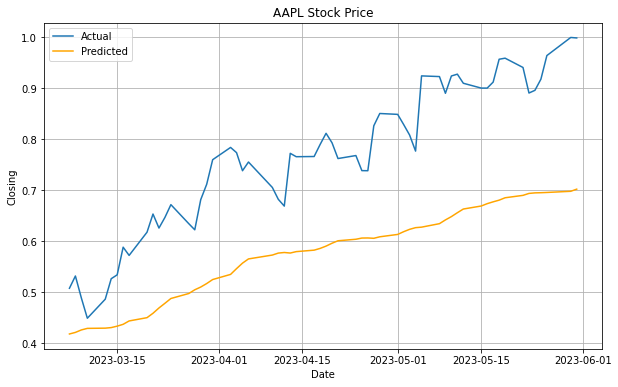

In [435]:
# Consolidating Predictions
pred_data = pd.DataFrame(y_pred, test_original.index,columns=['Close'])
actual_data = pd.DataFrame(y_test, test_original.index, columns=['Close'])

# Compare actual vs. predicted 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing')
plt.plot(actual_data, label='Actual')
plt.plot(pred_data, 'orange', label='Predicted')
plt.title('AAPL Stock Price')
plt.legend()

In [436]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
5/5 [==============================] - 3s 67ms/step - loss: 0.0640
Epoch 2/15
5/5 [==============================] - 0s 75ms/step - loss: 0.0153
Epoch 3/15
5/5 [==============================] - 0s 77ms/step - loss: 0.0205
Epoch 4/15
5/5 [==============================] - 0s 87ms/step - loss: 0.0126
Epoch 5/15
5/5 [==============================] - 0s 75ms/step - loss: 0.0130
Epoch 6/15
5/5 [==============================] - 1s 102ms/step - loss: 0.0106
Epoch 7/15
5/5 [==============================] - 0s 75ms/step - loss: 0.0102
Epoch 8/15
5/5 [==============================] - 0s 65ms/step - loss: 0.0097
Epoch 9/15
5/5 [==============================] - 0s 74ms/step - loss: 0.0093
Epoch 10/15
5/5 [==============================] - 0s 81ms/step - loss: 0.0095
Epoch 11/15
5/5 [==============================] - 0s 75ms/step - loss: 0.0092
Epoch 12/15
5/5 [==============================] - 0s 75ms/step - loss: 0.0085
Epoch 13/15
5/5 [==============================] - 0s 75ms/s

In [437]:
# Evaluate the model on the test data 
test_results = model.evaluate(X_test, y_test, batch_size=32)
print(test_results)

2/2 [==============================] - 1s 23ms/step - loss: 0.0294
0.02935365028679371


In [438]:
# Predict/Forecast
y_pred = model.predict(X_test)

2/2 [==============================] - 1s 74ms/step


In [439]:
y_pred

array([[0.38814035],
       [0.39739645],
       [0.40894118],
       [0.41748875],
       [0.42051005],
       [0.42280957],
       [0.42743126],
       [0.43353322],
       [0.44406202],
       [0.45493886],
       [0.46847734],
       [0.48493356],
       [0.49937513],
       [0.51283216],
       [0.52621204],
       [0.5352789 ],
       [0.53999007],
       [0.54610205],
       [0.55454355],
       [0.5671194 ],
       [0.5826194 ],
       [0.5974519 ],
       [0.6076688 ],
       [0.61545646],
       [0.617049  ],
       [0.61304843],
       [0.6050364 ],
       [0.6032751 ],
       [0.6045323 ],
       [0.6074865 ],
       [0.6129307 ],
       [0.62091684],
       [0.62811875],
       [0.63179946],
       [0.6335264 ],
       [0.63157547],
       [0.6276528 ],
       [0.6296598 ],
       [0.63656324],
       [0.64551413],
       [0.6532794 ],
       [0.6580311 ],
       [0.6581326 ],
       [0.66687685],
       [0.6792971 ],
       [0.69016904],
       [0.7017655 ],
       [0.712

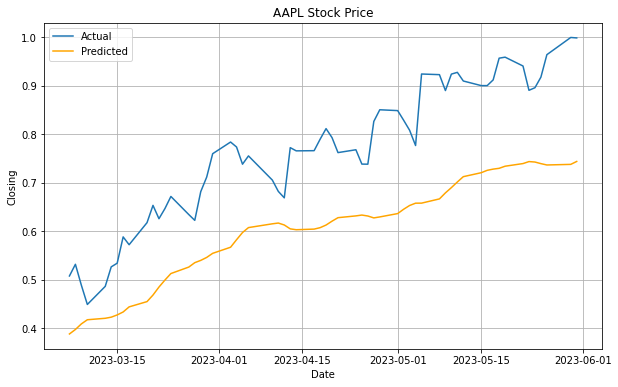

In [440]:
# Consolidating Predictions
pred_data = pd.DataFrame(y_pred, test_original.index,columns=['Close'])
actual_data = pd.DataFrame(y_test, test_original.index, columns=['Close'])

# Compare actual vs. predicted 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing')
plt.plot(actual_data, label='Actual')
plt.plot(pred_data, 'orange', label='Predicted')
plt.title('AAPL Stock Price')
plt.legend()

In [441]:
# Bidirectional LSTM 
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
5/5 [==============================] - 2s 25ms/step - loss: 0.1252
Epoch 2/15
5/5 [==============================] - 0s 24ms/step - loss: 0.0761
Epoch 3/15
5/5 [==============================] - 0s 29ms/step - loss: 0.0346
Epoch 4/15
5/5 [==============================] - 0s 43ms/step - loss: 0.0142
Epoch 5/15
5/5 [==============================] - 0s 37ms/step - loss: 0.0179
Epoch 6/15
5/5 [==============================] - 0s 31ms/step - loss: 0.0123
Epoch 7/15
5/5 [==============================] - 0s 31ms/step - loss: 0.0117
Epoch 8/15
5/5 [==============================] - 0s 30ms/step - loss: 0.0121
Epoch 9/15
5/5 [==============================] - 0s 30ms/step - loss: 0.0111
Epoch 10/15
5/5 [==============================] - 0s 30ms/step - loss: 0.0107
Epoch 11/15
5/5 [==============================] - 0s 28ms/step - loss: 0.0107
Epoch 12/15
5/5 [==============================] - 0s 30ms/step - loss: 0.0099
Epoch 13/15
5/5 [==============================] - 0s 38ms/st

In [442]:
# Evaluate the model on the test data 
test_results = model.evaluate(X_test, y_test, batch_size=32)
print(test_results)

# Predict/Forecast
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 11ms/step - loss: 0.0177
0.017659218981862068
2/2 [==============================] - 0s 8ms/step


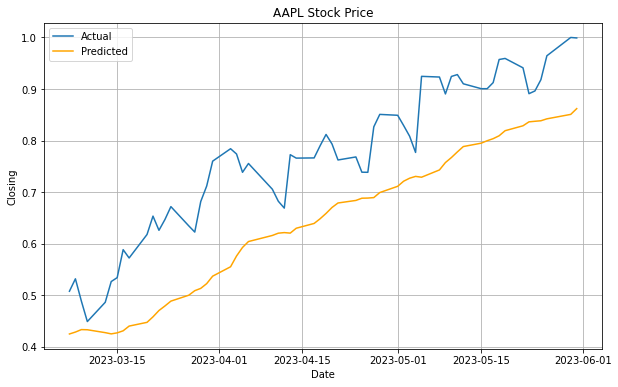

In [443]:
# Consolidating Predictions
pred_data = pd.DataFrame(y_pred, test_original.index,columns=['Close'])
actual_data = pd.DataFrame(y_test, test_original.index, columns=['Close'])

# Compare actual vs. predicted 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing')
plt.plot(actual_data, label='Actual')
plt.plot(pred_data, 'orange', label='Predicted')
plt.title('AAPL Stock Price')
plt.legend()

In [444]:
# Modified Bidirectional LSTM #1
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], 1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
5/5 [==============================] - 4s 21ms/step - loss: 0.1784
Epoch 2/15
5/5 [==============================] - 0s 22ms/step - loss: 0.0757
Epoch 3/15
5/5 [==============================] - 0s 22ms/step - loss: 0.0250
Epoch 4/15
5/5 [==============================] - 0s 26ms/step - loss: 0.0238
Epoch 5/15
5/5 [==============================] - 0s 33ms/step - loss: 0.0259
Epoch 6/15
5/5 [==============================] - 0s 35ms/step - loss: 0.0184
Epoch 7/15
5/5 [==============================] - 0s 30ms/step - loss: 0.0158
Epoch 8/15
5/5 [==============================] - 0s 29ms/step - loss: 0.0160
Epoch 9/15
5/5 [==============================] - 0s 28ms/step - loss: 0.0139
Epoch 10/15
5/5 [==============================] - 0s 27ms/step - loss: 0.0126
Epoch 11/15
5/5 [==============================] - 0s 27ms/step - loss: 0.0122
Epoch 12/15
5/5 [==============================] - 0s 28ms/step - loss: 0.0108
Epoch 13/15
5/5 [==============================] - 0s 28ms/st

In [445]:
# Evaluate the model on the test data 
test_results = model.evaluate(X_test, y_test, batch_size=32)
print(test_results)

# Predict/Forecast
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.0273
0.027293317019939423
2/2 [==============================] - 0s 8ms/step


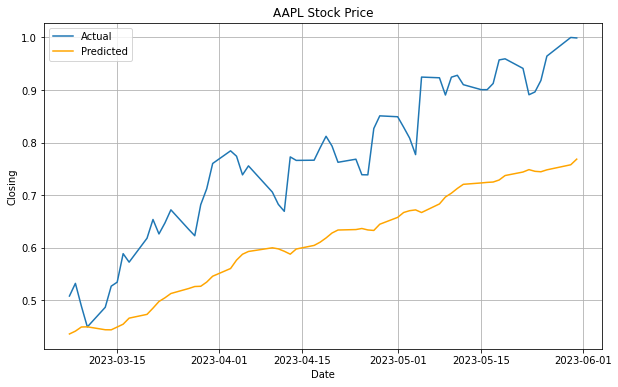

In [446]:
# Consolidating Predictions
pred_data = pd.DataFrame(y_pred, test_original.index,columns=['Close'])
actual_data = pd.DataFrame(y_test, test_original.index, columns=['Close'])

# Compare actual vs. predicted 
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing')
plt.plot(actual_data, label='Actual')
plt.plot(pred_data, 'orange', label='Predicted')
plt.title('AAPL Stock Price')
plt.legend()

In [447]:
# Modified Bidirectional LSTM #2
model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
# model.add(LSTM(64, return_sequences=False))
model.add(Bidirectional(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1))))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(1))
# model.add(Dense(1))
# model.add(LSTM(32, return_sequences=False))
# model.add(Dense(32))
# model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
5/5 [==============================] - 5s 74ms/step - loss: 0.0857
Epoch 2/15
5/5 [==============================] - 0s 90ms/step - loss: 0.0444
Epoch 3/15
5/5 [==============================] - 0s 93ms/step - loss: 0.0406
Epoch 4/15
5/5 [==============================] - 1s 111ms/step - loss: 0.0346
Epoch 5/15
5/5 [==============================] - 0s 91ms/step - loss: 0.0348
Epoch 6/15
5/5 [==============================] - 0s 100ms/step - loss: 0.0321
Epoch 7/15
5/5 [==============================] - 0s 92ms/step - loss: 0.0310
Epoch 8/15
5/5 [==============================] - 1s 106ms/step - loss: 0.0300
Epoch 9/15
5/5 [==============================] - 1s 109ms/step - loss: 0.0292
Epoch 10/15
5/5 [==============================] - 0s 90ms/step - loss: 0.0292
Epoch 11/15
5/5 [==============================] - 0s 91ms/step - loss: 0.0286
Epoch 12/15
5/5 [==============================] - 0s 95ms/step - loss: 0.0288
Epoch 13/15
5/5 [==============================] - 1s 110

In [448]:
# Evaluate the model on the test data
test_results = model.evaluate(X_test, y_test, batch_size=64)
print(test_results)

# Predict/Forecast
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 1s/step - loss: 0.1194
0.11936142295598984
2/2 [==============================] - 1s 27ms/step


In [417]:
# Ways to improve upon the current models: 
    # Conduct further research on LSTM models to better understand ways to tune the model without heavily risking 
    # overfitting. 
        # Experimenting with more LSTM models (different # of layers, etc.)
    # Research other ways to better massage the data that is fed into the model
        # Part of this step involves learning more EDA techniques to better understand the nature of the data 